In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, Y_train, Y_test = train_test_split(x,y,stratify=y,random_state=42)

param = random.sample(range(1, 50), 10)  #Generated random 10 numbers for parameters
param.sort()

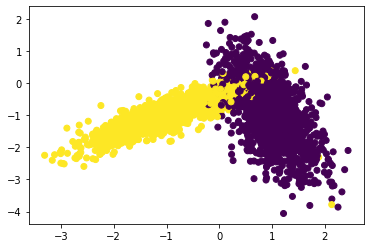

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=Y_test)
plt.show()

In [6]:


def RandomSearchCV(x_train,y_train, classifier,params, folds):
    trainScores = []
    testScores = []
    
    splitted_x_train = []
    splitted_y_train = []
    #Breaking training data into n= folds part
    for i in range(0, len(x_train), int(len(x_train)/folds)):
        splitted_x_train.append(x_train[i:i+int(len(x_train)/folds)])
        splitted_y_train.append(y_train[i:i+int(len(y_train)/folds)])

    #Now for each hyperparameter we are calculating testing score and training score .After each step we are calculating average of testing scores and training scores

    for k in params:
        trainScores_folds = []
        testScores_folds  = []

        for group in range(len(splitted_x_train)):
            X_train = np.concatenate(splitted_x_train[0:group] + splitted_x_train[group+1:])
            X_cv = splitted_x_train[group]
            Y_train = np.concatenate(splitted_y_train[0:group] + splitted_y_train[group+1:])
            Y_cv= splitted_y_train[group]

    
            classifier.n_neighbors = k
            classifier.fit(X_train, Y_train)

            
            Y_pred = classifier.predict(X_cv)
            testScores_folds.append(accuracy_score(Y_cv, Y_pred))

            Y_pred = classifier.predict(X_train)
            trainScores_folds.append(accuracy_score(Y_train, Y_pred))

        trainScores.append(np.mean(np.array(trainScores_folds)))
        testScores.append(np.mean(np.array(testScores_folds)))

    return trainScores, testScores
            
            
     

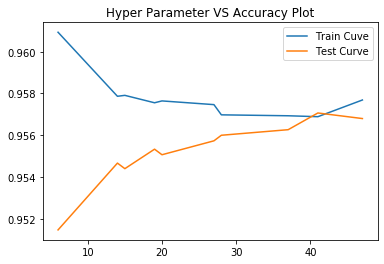

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
folds = 4
trainScores,testScores = RandomSearchCV(X_train,Y_train,neigh,param,folds)

plt.plot(param,trainScores,label = "Train Cuve")
plt.plot(param,testScores,label= "Test Curve")
plt.title("Hyper Parameter VS Accuracy Plot")
plt.legend()
plt.show()




In [8]:
# understanding this code line by line is not that important 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

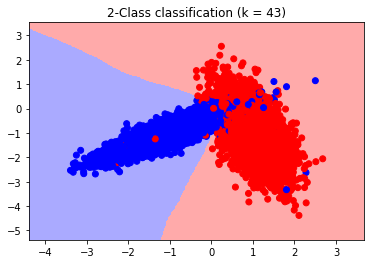

In [14]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 43)
neigh.fit(X_train, Y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], Y_train, neigh)